<h1>Содержание<span class="tocSkip"></span></h1>


1.	Подготовка данных
2.	Исследование задачи
3.	Борьба с дисбалансом
4.	Тестирование модели

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем библиотеки, метрики и инструменты, необходимые нам для работы, и изучим данные.

In [309]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

RANDOM = 42
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [310]:
df = pd.read_csv('Churn.csv')

In [311]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [312]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

Описание данных:
RowNumber — индекс строки в данных,
CustomerId — уникальный идентификатор клиента,
Surname — фамилия,
CreditScore — кредитный рейтинг,
Geography — страна проживания,
Gender — пол,
Age — возраст,
Tenure — сколько лет человек является клиентом банка,
Balance — баланс на счёте,
NumOfProducts — количество продуктов банка, используемых клиентом,
HasCrCard — наличие кредитной карты,
IsActiveMember — активность клиента,
EstimatedSalary — предполагаемая зарплата,

Целевой признак Exited — факт ухода клиента

In [314]:
print("Количесвто дубликатов:", df.duplicated().sum())
print("Количесвто пропусков:", df.isna().sum())

Количесвто дубликатов: 0
Количесвто пропусков: RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


Мы видим пропуски в столбце Tenure, где хранятся данные о том, скольо лет человек является клиентом банка. Заполним пропуски рандомными значениями от 1 до 10, именно столько составляет самый долгий срок использования банка клиентом.

In [315]:
#проверим, так ли это
print('Максимальное значение Tenure:', df['Tenure'].max())

Максимальное значение Tenure: 10.0


In [316]:
#заменим пропуски рандомными числами от 1 до 10
data = (np.random.randint(0,10,size=df['Tenure'].isna().sum()))
df.loc[df['Tenure'].isna(),'Tenure']=data

In [317]:
print("Количесвто пропусков:", df.isna().sum())

Количесвто пропусков: RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [318]:
#удалим столбцы-идентификаторы, не представляющие ценностия для алгоритма 
for_drop = ['RowNumber','CustomerId', 'Surname']
df = df.drop(for_drop, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [319]:
#применим one hot encoding к датафрейму, избежав ловушку фиктивных признаков
df_ohe=pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [320]:
gender_ohe = pd.get_dummies(df['Gender'], drop_first=True)
country_ohe = pd.get_dummies(df['Geography'], drop_first=True)
df.drop(['Gender', 'Geography'], axis=1, inplace=True)
df = pd.concat([df, gender_ohe, country_ohe], axis=1)

После того, как мы изучили и подготовили данные, восстановив пропущенные значения и применили OHE к датасету, приступаем к исследованию задачи.

## Исследование задачи

Разобьем данные на три выборки: обучающую, тестовую, валидационную с помощью train_test_split().

In [321]:
# получим обучающую выборку и выборку df_1
df_train, df_1 = train_test_split(df, test_size=0.4, random_state=12345)

In [322]:
#теперь разделим выборку df_1 на валидационную и тестовую
df_valid, df_test = train_test_split(df_1, test_size=0.5, random_state=12345)

Выделим целевой признак, который нам необходимо предсказать, и признаки, которые нам в этом помогут.

In [323]:
#разделим обучающий датафрейм на features и target
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

In [324]:
#разделим тестовый датафрейм на features и target
features_test = df_test.drop(['Exited'], axis=1)  
target_test = df_test['Exited']

In [325]:
#разделим валидационный датафрейм на features и target
features_valid = df_valid.drop(['Exited'], axis=1)  
target_valid = df_valid['Exited']

После того, как мы разделили датасет на обучающую, тестовую и валидационную выборки, приступим к их масштабированию методом scaler.

In [326]:
#Для масштабирования методом scaler зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [327]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [328]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7479,567,35,8.0,153137.74,1,1,0,88659.07,1,0,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,1,0
1247,512,24,6.0,0.00,2,1,0,37654.31,1,0,0
3716,665,27,2.0,147435.96,1,0,0,187508.06,0,1,0


In [329]:
#масштабируем обучающую выборку
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7479,-0.886751,-0.373192,1.048854,1.232271,-0.891560,1,0,-0.187705,1,0,1
3411,0.608663,-0.183385,1.048854,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.688714,1.027098,0.830152,0,1,1.503095,1,1,0
1247,-1.457915,-1.417129,0.353827,-1.233163,0.830152,1,0,-1.071061,1,0,0
3716,0.130961,-1.132419,-1.036227,1.140475,-0.891560,0,0,1.524268,0,1,0


In [330]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7041,438,38,2.0,0.00,2,1,0,136859.55,1,0,0
5709,644,39,9.0,0.00,1,1,0,3740.93,0,0,0
7117,564,31,5.0,121461.87,1,1,1,20432.09,1,0,1
7775,628,40,10.0,0.00,2,1,0,103832.58,1,0,1
8735,728,30,10.0,114835.43,1,0,1,37662.49,1,0,0


In [331]:
#масштабируем тестовую выборку
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7041,-2.226392,-0.088482,-1.036227,-1.233163,0.830152,1,0,0.647083,1,0,0
5709,-0.087120,0.006422,1.396367,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.006313,0.722307,-0.891560,1,1,-1.369334,1,0,1
7775,-0.253277,0.101325,1.743880,-1.233163,0.830152,1,0,0.075086,1,0,1
8735,0.785204,-0.847708,1.743880,0.615625,-0.891560,0,1,-1.070919,1,0,0


In [332]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
8532,585,35,2.0,0.00,2,1,0,98621.04,0,0,0
5799,625,45,3.0,0.00,1,1,1,184474.15,0,0,0
5511,667,32,0.0,103846.65,1,1,0,20560.69,1,1,0
7365,568,36,10.0,153610.61,1,1,1,54083.80,0,0,1
7367,606,42,10.0,0.00,2,1,0,177938.52,1,0,1


In [333]:
#масштабируем валидационную выборку
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
8532,-0.699824,-0.373192,-1.036227,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.688714,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.731254,0.438711,-0.891560,1,0,-1.367107,1,1,0
7365,-0.876366,-0.278288,1.743880,1.239884,-0.891560,1,1,-0.786517,0,0,1
7367,-0.481743,0.291132,1.743880,-1.233163,0.830152,1,0,1.358533,1,0,1


Дерево решений

In [334]:
DT = DecisionTreeClassifier()
param_grid = { 
    'max_features': ['log2'],
    'max_depth' : [5,7,9,11,13,15],
    'criterion' : ['gini']
}
CV_DT = GridSearchCV(estimator=DT, param_grid=param_grid, scoring='f1', cv=5)
CV_DT.fit(features_train, target_train)
prediction_valid_DT = CV_DT.best_estimator_.predict(features_valid)
score_DT = accuracy_score(prediction_valid_DT, target_valid)
F1_DT = f1_score(prediction_valid_DT, target_valid)

Случайный лес

In [335]:
RF = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 13, 15, 18, 20, 25, 30, 33, 45, 50, 56],
    'max_depth' : [5, 7, 9, 10, 11, 13, 15],
    'criterion' : ['gini']
}
CV_RF = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='f1', cv=5)
CV_RF.fit(features_train,target_train)
prediction_valid_RF = CV_RF.predict(features_valid)
score_RF = accuracy_score(prediction_valid_RF, target_valid)
F1_RF = f1_score(prediction_valid_RF, target_valid)

Логистическая регрессия

In [336]:
LR = LogisticRegression(random_state = 12345)
LR.fit(features_train, target_train)
prediction_valid_LR = LR.predict(features_valid)
score_LR = accuracy_score(prediction_valid_LR, target_valid)
F1_LR = f1_score(prediction_valid_LR, target_valid)

Дополнительно измерим AUC-ROC для каждой модели

In [337]:
DT_proba_valid = CV_DT.predict_proba(features_valid)[:, 1]

auc_roc_DT = roc_auc_score(target_valid, DT_proba_valid)

auc_roc_DT

0.695961293015322

In [338]:
RF_proba_valid = CV_RF.predict_proba(features_valid)[:, 1]

auc_roc_RF = roc_auc_score(target_valid, RF_proba_valid)

auc_roc_RF

0.8345395871013012

In [339]:
LR_proba_valid = LR.predict_proba(features_valid)[:, 1]

auc_roc_LR = roc_auc_score(target_valid, LR_proba_valid)

auc_roc_LR

0.7586091132900634

In [340]:
print(f'Дерево решений Accuracy: {score_DT}')
print(f'Дерево решений F1: {F1_DT}')
print(f'Дерево решений AUC-ROC: {auc_roc_DT}')
print(f'Случайный лес Accuracy: {score_RF}')
print(f'Случайный лес F1: {F1_RF}')
print(f'Случайный лес AUC-ROC: {auc_roc_RF}')
print(f'Логистическая регрессия Accuracy: {score_LR}')
print(f'Логистическая регрессия  лес F1: {F1_LR}')
print(f'Логистическая регрессия  AUC-ROC: {auc_roc_LR}')

Дерево решений Accuracy: 0.8035
Дерево решений F1: 0.49936305732484076
Дерево решений AUC-ROC: 0.695961293015322
Случайный лес Accuracy: 0.8655
Случайный лес F1: 0.6038291605301914
Случайный лес AUC-ROC: 0.8345395871013012
Логистическая регрессия Accuracy: 0.802
Логистическая регрессия  лес F1: 0.33108108108108103
Логистическая регрессия  AUC-ROC: 0.7586091132900634


Наиболее качественные результаты прогнозирует модель случайного леса (Random Forest), худшие – логистическая регрессия (Logistic Regression). F1 для всех выборок пока что ниже 0,55.  Наше целевое значение F1 меры = 0,6.

Исследуем баланс классов в выборках.

In [341]:
target_train.value_counts(normalize = 1)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

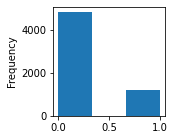

In [342]:
target_train.plot(kind ='hist', bins=3, figsize=(2,2))

In [343]:
target_test.value_counts(normalize = 1)

0    0.7885
1    0.2115
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

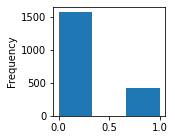

In [344]:
target_test.plot(kind ='hist', bins=3, figsize=(2,2))

In [345]:
target_valid.value_counts(normalize = 1)

0    0.791
1    0.209
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

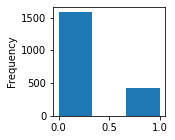

In [346]:
target_valid.plot(kind ='hist', bins=3, figsize=(2,2))

В наших выборках отрицательных ответов ≈80% , положительных ≈ 20%. Здесь очевиден дисбаланс, от которого нам предстоит избавиться дальше.

## Борьба с дисбалансом

Upsampling

In [347]:
#создадим функцию для увеличения положительного класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled

Downsampling

In [348]:
#уменьшаем число отрицательного класса в выборке 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [349]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, fraction=0.25)
print(target_downsampled_train.value_counts(normalize = 0))
print(target_downsampled_train.shape)

0    1201
1    1196
Name: Exited, dtype: int64
(2397,)


In [350]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.941407
1    0.058593
Name: Exited, dtype: float64
(20412,)


In [351]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

In [352]:
#Применим функцию upsample и увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


<AxesSubplot:ylabel='Frequency'>

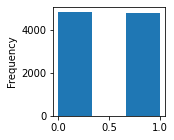

In [353]:
target_train_upsampled.plot(kind ='hist', bins=3, figsize=(2,2))

<AxesSubplot:ylabel='Frequency'>

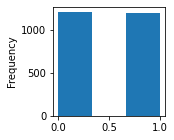

In [354]:
target_downsampled_train.plot(kind ='hist', bins=3, figsize=(2,2))

Upsample и downsample дает практически идеальное соотношение. Проверим F1 моделей на выборках с дисбалансом и без дисбаланса.

In [355]:
DT_upsampled = DecisionTreeClassifier()
param_grid = { 
    'max_features': ['log2'],
    'max_depth' : [5, 7, 10, 13, 15, 20],
    'min_samples_leaf': [3, 4, 5, 7],
    'criterion' : ['gini']
}
CV_DT_upsampled = GridSearchCV(estimator=DT_upsampled, param_grid=param_grid, scoring='f1', cv=5)
CV_DT_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_DT_upsampled = CV_DT_upsampled.best_estimator_.predict(features_valid)
F1_DT_upsampled = f1_score(prediction_DT_upsampled, target_valid)

In [356]:
print(f'Дерево решений c дисбалансом: {F1_DT}')
print(f'Дерево решений без дисбаланса: {F1_DT_upsampled}')

Дерево решений c дисбалансом: 0.49936305732484076
Дерево решений без дисбаланса: 0.4934804413239719


In [357]:
DT_upsampled_valid = CV_DT_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_DT_upsampled = roc_auc_score(target_valid, DT_upsampled_valid)

auc_roc_DT_upsampled

0.70879859544275

In [358]:
RF_upsampled = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 13, 15, 18, 20, 25, 30, 33, 45, 50, 56],
    'max_depth' : [5, 7, 9, 10, 11, 13, 15],
    'criterion' : ['gini']
}
CV_RF_upsampled = GridSearchCV(estimator=RF_upsampled, param_grid=param_grid, scoring='f1', cv=5)
CV_RF_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_RF_upsampled = CV_RF_upsampled.predict(features_valid)
F1_RF_upsampled = f1_score(prediction_RF_upsampled, target_valid)

In [359]:
print(f'Случайный лес c дисбалансом: {F1_RF}')
print(f'Случайный лес без дисбаланса: {F1_RF_upsampled}')

Случайный лес c дисбалансом: 0.6038291605301914
Случайный лес без дисбаланса: 0.6053639846743295


In [360]:
RF_upsampled_valid = CV_RF_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_RF_upsampled = roc_auc_score(target_valid, RF_upsampled_valid)

auc_roc_RF_upsampled

0.8402505156697053

In [361]:
LR_upsampled = LogisticRegression()
LR_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_LR_upsampled = LR_upsampled.predict(features_valid)
F1_LR_upsampled = f1_score(prediction_LR_upsampled, target_valid)

In [362]:
LR_upsampled_valid = LR_upsampled.predict_proba(features_valid)[:, 1]

auc_roc_LR_upsampled = roc_auc_score(target_valid, LR_upsampled_valid)

auc_roc_LR_upsampled

0.763437656893642

In [363]:
print(f'Логистическая регрессия c дисбалансом: {F1_LR}')
print(f'Логистическая регрессия без дисбаланса: {F1_LR_upsampled }')

Логистическая регрессия c дисбалансом: 0.33108108108108103
Логистическая регрессия без дисбаланса: 0.48843187660668386


 Теперь проверим Downsample

In [364]:
DT_downsampled = DecisionTreeClassifier()
param_grid = { 
    'max_features': ['log2'],
    'max_depth' : [5, 7, 9, 10, 15],
    'min_samples_leaf': [3, 4, 5, 7],
    'criterion' : ['gini']
}
CV_DT_downsampled = GridSearchCV(estimator=DT_downsampled, param_grid=param_grid, scoring='f1', cv=5)
CV_DT_downsampled.fit(features_downsampled_train, target_downsampled_train)
prediction_DT_downsampled = CV_DT_downsampled.best_estimator_.predict(features_valid)
F1_DT_downsampled = f1_score(prediction_DT_downsampled, target_valid)

In [365]:
print(f'Дерево решений c дисбалансом: {F1_DT}')
print(f'Дерево решений без дисбаланса: {F1_DT_downsampled }')

Дерево решений c дисбалансом: 0.49936305732484076
Дерево решений без дисбаланса: 0.5124250214224507


In [366]:
DT_downsampled_valid = CV_DT_downsampled.predict_proba(features_valid)[:, 1]

auc_roc_DT_downsampled = roc_auc_score(target_valid, DT_downsampled_valid)

auc_roc_DT_downsampled

0.764214185907246

In [367]:
RF_downsampled = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10, 13, 15, 18, 20, 25, 30, 33, 45, 50, 56],
    'max_depth' : [5, 7, 9, 10, 11, 13, 15],
    'criterion' : ['gini']
}
CV_RF_downsampled = GridSearchCV(estimator=RF_downsampled, param_grid=param_grid, scoring='f1', cv=5)
CV_RF_downsampled.fit(features_downsampled_train, target_downsampled_train)
prediction_RF_downsampled = CV_RF_downsampled.predict(features_valid)
F1_RF_downsampled = f1_score(prediction_RF_downsampled, target_valid)

In [368]:
print(f'Случайный лес c дисбалансом: {F1_RF}')
print(f'Случайный лес без дисбаланса: {F1_RF_downsampled}')

Случайный лес c дисбалансом: 0.6038291605301914
Случайный лес без дисбаланса: 0.6057692307692308


In [369]:
RF_downsampled_valid = CV_RF_downsampled.predict_proba(features_valid)[:, 1]

auc_roc_RF_downsampled = roc_auc_score(target_valid, RF_downsampled_valid)

auc_roc_RF_downsampled

0.8488104815538444

In [370]:
LR_downsampled = LogisticRegression(random_state=12345)
LR_downsampled.fit(features_downsampled_train, target_downsampled_train)
prediction_LR_downsampled = LR_downsampled.predict(features_valid)
F1_LR_downsampled = f1_score(prediction_LR_downsampled, target_valid)

In [371]:
LR_downsampled_valid = LR_downsampled.predict_proba(features_valid)[:, 1]

auc_roc_LR_downsampled = roc_auc_score(target_valid, LR_downsampled_valid)

auc_roc_LR_downsampled

0.7626815429563449

In [372]:
print(f'Логистическая регрессия c дисбалансом: {F1_LR}')
print(f'Логистическая регрессия без дисбаланса: {F1_LR_downsampled }')

Логистическая регрессия c дисбалансом: 0.33108108108108103
Логистическая регрессия без дисбаланса: 0.4896907216494845


In [373]:
print(f'Дерево решений c дисбалансом: {F1_DT}')
print(f'Дерево решений без дисбаланса upsample: {F1_DT_upsampled }')
print(f'Дерево решений без дисбаланса downsample: {F1_DT_downsampled }')
print(' ')
print(f'Случайный лес c дисбалансом: {F1_RF}')
print(f'Случайный лес без дисбаланса upsample: {F1_RF_upsampled}')
print(f'Случайный лес без дисбаланса downsample: {F1_RF_downsampled}')
print(' ')
print(f'Логистическая регрессия c дисбалансом: {F1_LR}')
print(f'Логистическая регрессия без дисбаланса upsample: {F1_LR_upsampled }')
print(f'Логистическая регрессия без дисбаланса downsample: {F1_LR_downsampled }')

Дерево решений c дисбалансом: 0.49936305732484076
Дерево решений без дисбаланса upsample: 0.4934804413239719
Дерево решений без дисбаланса downsample: 0.5124250214224507
 
Случайный лес c дисбалансом: 0.6038291605301914
Случайный лес без дисбаланса upsample: 0.6053639846743295
Случайный лес без дисбаланса downsample: 0.6057692307692308
 
Логистическая регрессия c дисбалансом: 0.33108108108108103
Логистическая регрессия без дисбаланса upsample: 0.48843187660668386
Логистическая регрессия без дисбаланса downsample: 0.4896907216494845


In [374]:
print(f'AUC-ROC дерева решений с дисбалансом: {auc_roc_DT}')
print(f'AUC-ROC дерева решений без дисбаланса upsamle: {auc_roc_DT_upsampled}')
print(f'AUC-ROC дерева решений без дисбаланса downsample: {auc_roc_DT_downsampled}')
print(' ')
print(f'AUC-ROC случайного леса с дисбалансом: {auc_roc_RF}')
print(f'AUC-ROC случайного леса без дисбаланса upsample: {auc_roc_RF_upsampled}')
print(f'AUC-ROC случайного леса без дисбаланса downsample: {auc_roc_RF_downsampled}')
print(' ')
print(f'AUC-ROC логистической регрессии с дисбалансом: {auc_roc_LR}')
print(f'AUC-ROC логистической регрессии без дисбаланса upsample: {auc_roc_LR_upsampled}')
print(f'AUC-ROC логистической регрессии без дисбаланса downsample: {auc_roc_LR_downsampled}')

AUC-ROC дерева решений с дисбалансом: 0.695961293015322
AUC-ROC дерева решений без дисбаланса upsamle: 0.70879859544275
AUC-ROC дерева решений без дисбаланса downsample: 0.764214185907246
 
AUC-ROC случайного леса с дисбалансом: 0.8345395871013012
AUC-ROC случайного леса без дисбаланса upsample: 0.8402505156697053
AUC-ROC случайного леса без дисбаланса downsample: 0.8488104815538444
 
AUC-ROC логистической регрессии с дисбалансом: 0.7586091132900634
AUC-ROC логистической регрессии без дисбаланса upsample: 0.763437656893642
AUC-ROC логистической регрессии без дисбаланса downsample: 0.7626815429563449


Показатели всех моделей улучшились, лучшие результаты и при устранении дисбаланса через upsampling, и через downsampling показывает случаный лес (Random Forest). Большее улучшение показывает увеличенная выборка upsampling, соответсвенное далее проверять мы будем именно ее. F1 случайного леса у upsampling = 0.6 , что уже равно целевому значению 0,59. 

## Тестирование модели

Объединим обучающую и валидационную выборку, чтобы получить больше данных и проверим увеличенную выборку случайного леса.

In [375]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

features_upsampled_full, target_upsampled_full = upsample(features_full_train, target_full_train, 4, 1)

In [376]:
#Достанем лучшие гиперпараметры
CV_RF_upsampled.best_estimator_ 

RandomForestClassifier(max_depth=15, n_estimators=45)

In [377]:
RF_full_upsampled = RandomForestClassifier(max_depth=15, n_estimators=50)
RF_full_upsampled.fit(features_upsampled_full, target_upsampled_full)
prediction_RF_full_upsampled = RF_full_upsampled.predict(features_valid)
F1_RF_full_upsampled = f1_score(prediction_RF_full_upsampled, target_valid)

In [378]:
print(f'Случайный лес на объединенной выборке: {F1_RF_full_upsampled}')

Случайный лес на объединенной выборке: 0.9812206572769953


In [379]:
RF_full_upsampled_test = RF_full_upsampled.predict_proba(features_test)[:, 1]

auc_roc_RF_full_upsampled = roc_auc_score(target_test, RF_full_upsampled_test)

auc_roc_RF_full_upsampled

0.8504372098322369

 Проверим случайный лес, показавший лучший результат, на тестовой выборке

In [380]:
final_model_RF = RandomForestClassifier(max_depth=15, n_estimators=50)
final_model_RF.fit(features_train_upsampled, target_train_upsampled)
final_model_RF_prediction = final_model_RF.predict(features_test)
final_F1_RF = f1_score(final_model_RF_prediction, target_test)
final_F1_RF

0.5909090909090909

In [381]:
RF_final = final_model_RF.predict_proba(features_test)[:, 1]

auc_roc_RF_final = roc_auc_score(target_test, RF_final)

auc_roc_RF_final

0.8472254077901753

In [382]:
print(f'F1 случайного леса финальной модели: {final_F1_RF}')
print(f'AUC-ROC случайного леса финальной модели: {auc_roc_RF_final}')

F1 случайного леса финальной модели: 0.5909090909090909
AUC-ROC случайного леса финальной модели: 0.8472254077901753


 Проверим случайный лес, показавший лучший результат, на тестовой выборке, используя данные объединенной увеличенной выборки.

In [383]:
final_model_RF_full = RandomForestClassifier(max_depth=15, n_estimators=50)
final_model_RF_full.fit(features_upsampled_full, target_upsampled_full)
final_model_RF_prediction_full = final_model_RF_full.predict(features_test)
final_F1_RF_full = f1_score(final_model_RF_prediction, target_test)
final_F1_RF_full

0.5909090909090909

In [384]:
RF_final_full = final_model_RF_full.predict_proba(features_test)[:, 1]

auc_roc_RF_final_full = roc_auc_score(target_test, RF_final_full)

auc_roc_RF_final_full

0.8517714006455086

In [385]:
print(f'F1 случайного леса финальной модели на объединенных данных: {final_F1_RF_full}')
print(f'AUC-ROC случайного леса финальной модели на объединенных данных: {auc_roc_RF_final_full}')

F1 случайного леса финальной модели на объединенных данных: 0.5909090909090909
AUC-ROC случайного леса финальной модели на объединенных данных: 0.8517714006455086


Объединенная выборка показала результат выше, он F1 = 0.98.

# Выводы

Нами был проведен первичный анализ данных, предобработка данных, в ходе которой мы заполнили пропуски, применили OHE, чтобы избежать ловушку фиктивных признаков.
 
Далее мы разделили данные на три выборки: обучающую, тестовую, валидационную с помощью train_test_split() и масштабировали их методом scaler и обучили моделиб подобрав гиперпараметры через GridSearchCV. До устранения дисбаланса модели показали следующие результаты:

Дерево решений 
- F1: 0.49936305732484076
- AUC-ROC: 0.695961293015322

Случайный лес
- F1: 0.6038291605301914
- AUC-ROC: 0.8345395871013012

Логистическая регрессия
- F1: 0.33108108108108103
- AUC-ROC: 0.7586091132900634

В ходе исследования данных нами был выявлен явный дисбаланс классов: отрицательные значения = 80%, положитльные – 20%. Для борьбы с дисбалансом использовали upsampling и downsampling, более эффективным оказался upsampling (увеличение положительного класса в выборке). Благодаря этому все показатели увеличились, наиболее высокие результаты показал Random Forest.

Результаты моделей после устранения дисбаланса с помощью upsampling:

Дерево решений

- F1: 0.4934804413239719
- AUC-ROC: 0.70879859544275

Случайный лес

- F1: 0.6053639846743295
- AUC-ROC: 0.8402505156697053

Логистическая регрессия

- F1: 0.48843187660668386
- AUC-ROC: 0.763437656893642

F1 случайного леса = 0.6053639846743295 после устранения дисбаланса, что выше целевого показателя. F1 случайного леса на объединенной выборке = 0.9812206572769953. Целевое значение достигнуто в обоих случаях.

После проверки на тестовой выборке результат финальной модели на обучающей увеличенной выборке:

- F1 =  0.5909090909090909
- AUC-ROC случайного леса финальной модели: 0.8517714006455086.
